In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import requests
import zipfile
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive = '/content/drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
MODEL= drive+'model'


In [ ]:
# Setup path to data folder
data_path = Path(drive)
image_path = data_path / 'NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data'


In [ ]:
# with zipfile.ZipFile(image_path/'images.zip', "r") as zip_ref:
#         print("Unzipping data...")
#         zip_ref.extractall(image_path)

In [ ]:
for dirpath, dirnames, filenames in os.walk(image_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 11 images in '/content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data'.
There are 1 directories and 2 images in '/content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch'.
There are 0 directories and 3763 images in '/content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/images'.
There are 0 directories and 237 images in '/content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/images'.


In [ ]:
image_path

PosixPath('/content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data')

In [ ]:
df_train_raw = pd.read_csv(image_path/'ndbufes_TaskIV_parsed_folders.csv')
df_test = pd.read_csv(image_path/'ndbufes_TaskIV_parsed_test.csv')
df_test.sample(3)

,localization_Tongue,localization_Lip,localization_Floor of mouth,localization_Buccal mucosa,localization_Palate,localization_Gingiva,larger_size,tobacco_use_Yes,tobacco_use_Former,tobacco_use_No,...,sun_exposure_Not informed,gender_M,gender_F,age_group_2,age_group_1,age_group_0,path,TaskIV,folder,label_number
18,1,0,0,0,0,0,2.0,0,0,1,...,0,0,1,1,0,0,0109.png,OSCC,6,2
34,0,0,0,0,0,1,3.0,0,0,0,...,1,1,0,1,0,0,0193.png,OSCC,6,2
7,1,0,0,0,0,0,1.0,0,0,0,...,1,0,1,1,0,0,0034.png,OSCC,6,2


In [ ]:
# df['res'] = df.diagnosis + df.fillna('').dysplasia_severity
# df_x = df[['localization',
#        'larger_size', 'tobacco_use', 'alcohol_consumption', 'sun_exposure',
#        'gender', 'skin_color', 'age_group', 'res']]
# x_df = df_x.drop(columns='res')
# x_df_img = df.path
# y_df = df_x.res

In [ ]:
# class_to_idx = y_df.unique()
# idx_to_class = {i:j for i, j in enumerate(class_to_idx) }
# idx_to_class

In [ ]:
df_train_raw.iloc[:,:-4].head(2)
df_train_raw.shape

(198, 27)

In [ ]:

int(df_train_raw.shape[0]*0.85)

168

In [ ]:
df_train = df_train_raw[:int(df_train_raw.shape[0]*0.85)]
df_val = df_train_raw[int(df_train_raw.shape[0]*0.85):]
df_train.shape, df_val.shape

((168, 27), (30, 27))

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2,
                                  #  zoom_range=0.2,
                                   vertical_flip=True,
                                   horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [ ]:
# train_dataset = train_datagen.flow_from_dataframe(df_train,
#                                                   x_col='path',
#                                                   y_col='lesion',
#                                                   target_size=(227,227),
#                                                   directory=image_path/'images/',
#                                                   batch_size=8,
#                                                   shuffle=False,
#                                                   class_mode='categorical')

# val_dataset =    train_datagen.flow_from_dataframe(df_val,
#                                                   x_col='path',
#                                                   y_col='lesion',
#                                                   target_size=(227,227),
#                                                   directory=image_path/'images/',
#                                                   batch_size=8,
#                                                   shuffle=False,
#                                                   class_mode='categorical')

# test_dataset =   test_datagen.flow_from_dataframe(df_test,
#                                                   x_col='path',
#                                                   y_col='lesion',
#                                                   target_size=(227,227),
#                                                   directory=image_path/'images/',
#                                                   batch_size=8,
#                                                   class_mode='categorical')

train_dataset = train_datagen.flow_from_dataframe(df_train,
                                                  x_col='path',
                                                  target_size=(384,512),
                                                  directory=image_path/'images/',
                                                  batch_size=8,
                                                  shuffle=False,
                                                  class_mode='input')

val_dataset =    train_datagen.flow_from_dataframe(df_val,
                                                  x_col='path',
                                                  target_size=(384,512),
                                                  directory=image_path/'images/',
                                                  batch_size=8,
                                                  shuffle=False,
                                                  class_mode='input')

test_dataset =   test_datagen.flow_from_dataframe(df_test,
                                                  x_col='path',
                                                  target_size=(384,512),
                                                  directory=image_path/'images/',
                                                  batch_size=8,
                                                  class_mode='input')

Found 168 validated image filenames.
Found 30 validated image filenames.
Found 39 validated image filenames.


In [ ]:
# class_idx = train_dataset.class_indices
# idx_class = [i for i in class_idx.keys()]
# idx_class

In [ ]:
idx_class = df_train_raw.TaskIV.unique().tolist()
class_idx = {j:i for i,j in enumerate(idx_class)}
class_idx, idx_class

({'OSCC': 0,
  'Leukoplakia with dysplasia': 1,
  'Leukoplakia without dysplasia': 2},
 ['OSCC', 'Leukoplakia with dysplasia', 'Leukoplakia without dysplasia'])

In [ ]:
len(train_dataset), train_dataset[0][0][0].shape

(21, (384, 512, 3))

In [ ]:
train_dataset[0][0][0].shape, train_dataset[0][1][0].shape

((384, 512, 3), (384, 512, 3))

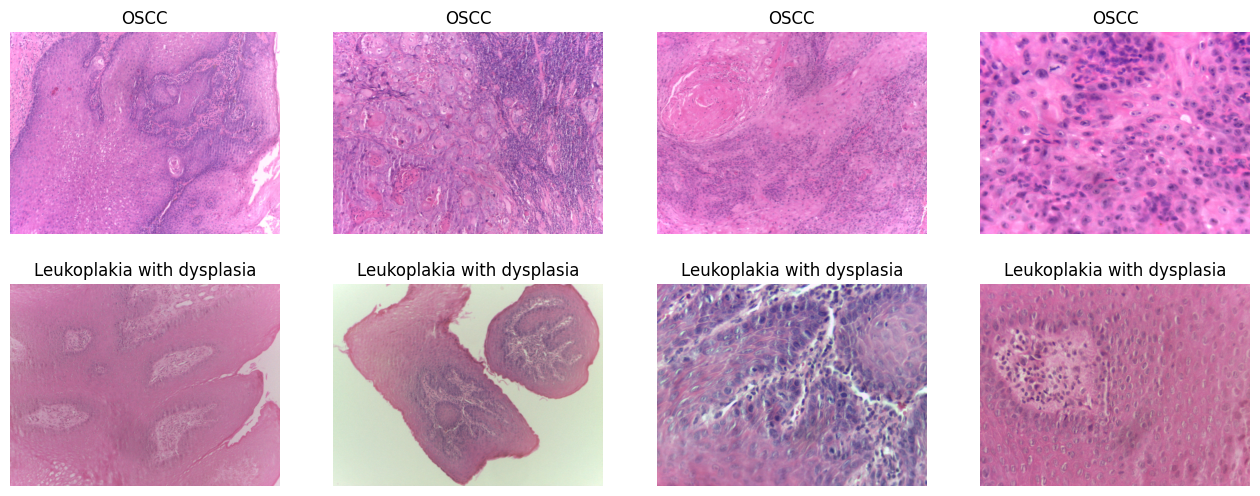

In [ ]:
plt.figure(figsize=(16,6))
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.title(df_train.TaskIV[i])
  plt.axis('off')
  plt.imshow(train_dataset[0][0][i])

In [ ]:
# plt.figure(figsize=(16,10))
# for batch in train_dataset:
#   for i in range(16):
#     plt.subplot(4,4,i+1)
#     plt.title(idx_class[np.argmax(batch[1][i])])
#     plt.axis('off')
#     plt.imshow(batch[0][i])
#   break

In [ ]:
train_input = tf.data.Dataset.from_tensor_slices(df_train.iloc[:,:-4].values).batch(8)
val_input = tf.data.Dataset.from_tensor_slices(df_val.iloc[:,:-4].values).batch(8)
test_input = tf.data.Dataset.from_tensor_slices(df_test.iloc[:,:-4].values).batch(8)

train_output = tf.data.Dataset.from_tensor_slices(df_train.TaskIV.apply(lambda x: class_idx[x]).values).batch(8)
val_output = tf.data.Dataset.from_tensor_slices(df_val.TaskIV.apply(lambda x: class_idx[x]).values).batch(8)
test_output = tf.data.Dataset.from_tensor_slices(df_test.TaskIV.apply(lambda x: class_idx[x]).values).batch(8)

In [ ]:
# train_input = tf.convert_to_tensor(df_train.iloc[:,:-4].values, dtype=tf.float32)
# val_input = tf.convert_to_tensor(df_val.iloc[:,:-4].values, dtype=tf.float32)
# test_input = tf.convert_to_tensor(df_test.iloc[:,:-4].values, dtype=tf.float32)

# train_output = tf.convert_to_tensor(df_train.TaskIV.apply(lambda x: class_idx[x]).values, dtype=tf.float32)
# val_output = tf.convert_to_tensor(df_val.TaskIV.apply(lambda x: class_idx[x]).values, dtype=tf.float32)
# test_output = tf.convert_to_tensor(df_test.TaskIV.apply(lambda x: class_idx[x]).values, dtype=tf.float32)

In [ ]:
len(train_input), type(train_output)

(21, tensorflow.python.data.ops.batch_op._BatchDataset)

In [ ]:
input_img_shape = train_dataset[0][0][0].shape  # (384, 512, 3)
input_txt_shape = (df_train.iloc[:,:-4].values.shape[1],)  # (23,)
output_shape = len(idx_class) # 3

input_img_shape, input_txt_shape, output_shape

((384, 512, 3), (23,), 3)

In [ ]:

image_input = keras.layers.Input(shape=input_img_shape)

x = keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)) (image_input)
x = keras.layers.BatchNormalization() (x)
x = keras.layers.MaxPool2D(pool_size=(2,2)) (x)

x = keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same') (x)
x = keras.layers.BatchNormalization() (x)
x = keras.layers.MaxPool2D(pool_size=(3,3)) (x)

x = keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same') (x)
x = keras.layers.BatchNormalization() (x)

x = keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding='same') (x)
x = keras.layers.BatchNormalization() (x)

x = keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding='same') (x)
x = keras.layers.BatchNormalization() (x)
x = keras.layers.MaxPool2D(pool_size=(2,2)) (x)

x = keras.layers.Flatten() (x)


text_input = keras.layers.Input(shape=input_txt_shape)

y = keras.layers.Dense(23, activation='relu') (text_input)

f = keras.layers.concatenate([x, y])

z = keras.layers.Dense(1024, activation='relu') (f)
z = keras.layers.Dropout(0.5) (z)

z = keras.layers.Dense(1024, activation='relu') (z)
z = keras.layers.Dropout(0.5) (z)

output_layer = keras.layers.Dense(output_shape, activation='softmax') (z)

model = keras.Model(inputs=[image_input, text_input], outputs=output_layer)

model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 384, 512, 3)]        0         []                            
                                                                                                  
 conv2d_25 (Conv2D)          (None, 94, 126, 128)         46592     ['input_11[0][0]']            
                                                                                                  
 batch_normalization_25 (Ba  (None, 94, 126, 128)         512       ['conv2d_25[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 max_pooling2d_15 (MaxPooli  (None, 47, 63, 128)          0         ['batch_normalization_2

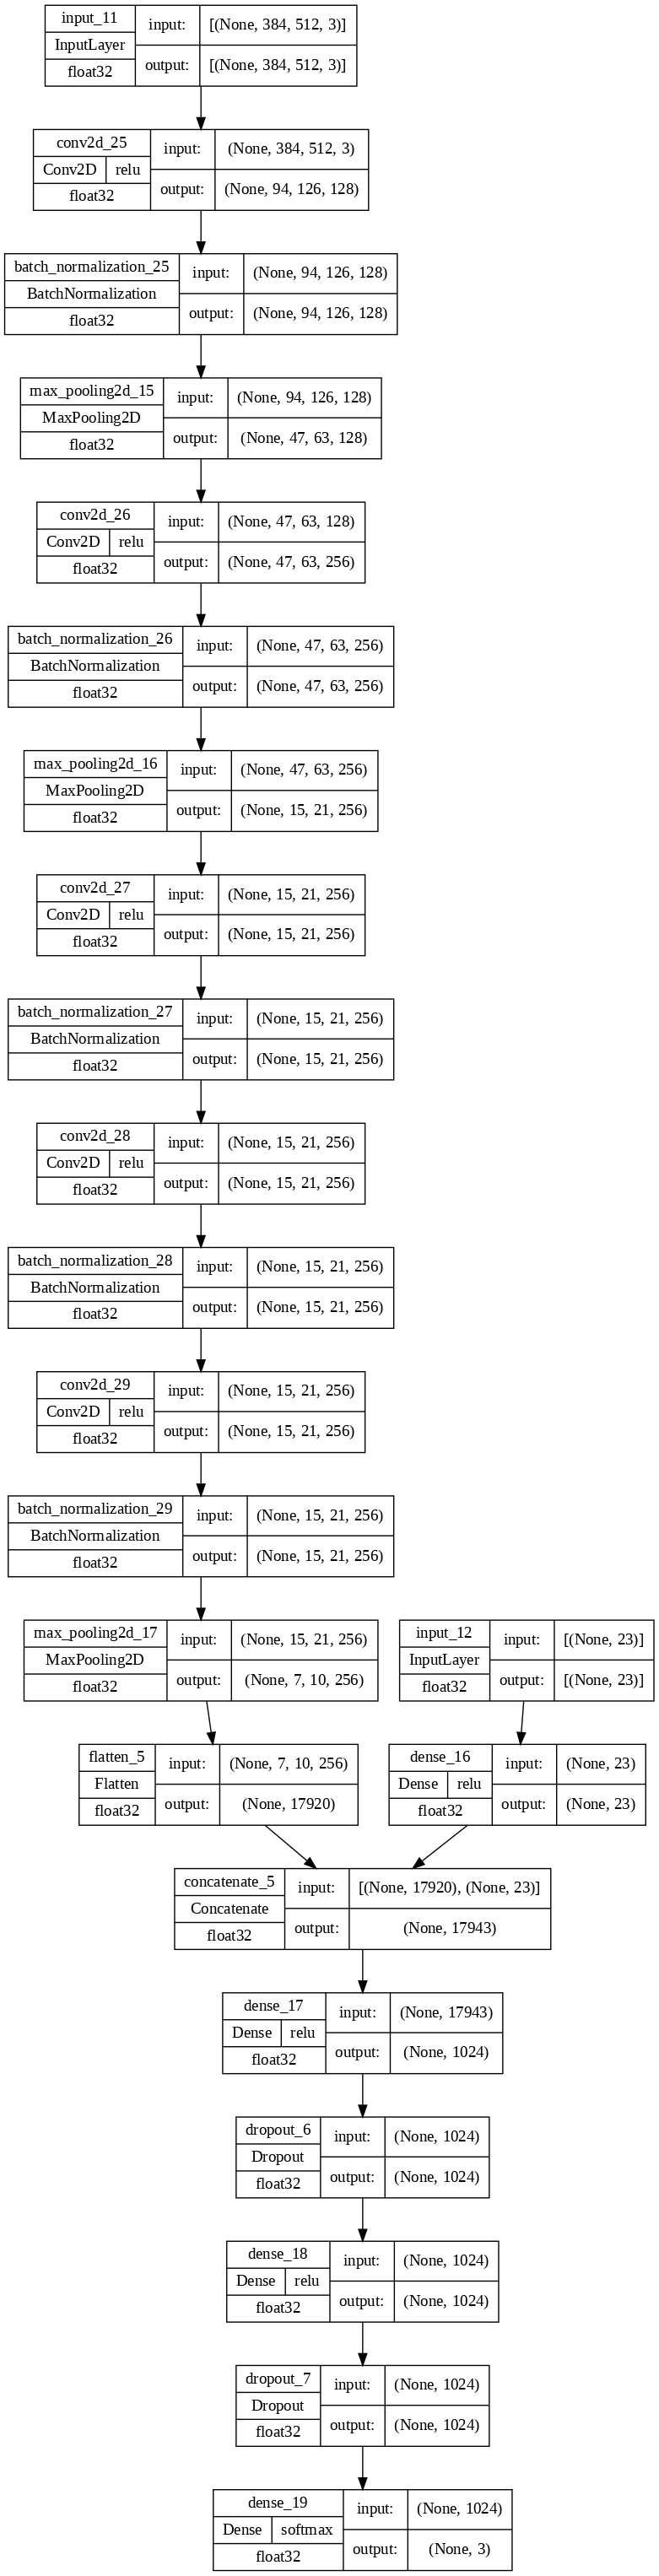

In [ ]:
keras.utils.plot_model(model, show_layer_activations=True, show_dtype=True, show_layer_names=True, show_shapes=True, dpi=100)

In [ ]:
# loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
# model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpointPath = data_path / 'model_w' / 'model1' / 'van'



mcp_point = tf.keras.callbacks.ModelCheckpoint(filepath=checkpointPath,
                                                       save_weights_only = True,
                                                       save_best_only = True,
                                                       monitor = 'val_loss',
                                                       verbose = 1)

es_point = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=5,
                                                        verbose=1,
                                                        restore_best_weights=True,
                                                        start_from_epoch=0,)

lr_decay = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                factor=.5,
                                                patience=2,
                                                verbose=1,
                                                mode='auto')

In [ ]:
history = model.fit([train_dataset,train_input], train_output, validation_data=([val_dataset,val_input],val_output), epochs=10, batch_size=8, callbacks=[es_point])

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'keras.src.preprocessing.image.DataFrameIterator'>", "<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>"}), <class 'tensorflow.python.data.ops.batch_op._BatchDataset'>

In [ ]:
#  https://pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/#pyis-cta-modal
#  https://kumaramarjeet001.medium.com/converting-tensors-into-batches-74c400c6b16f

In [ ]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

In [ ]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))
props = dict(boxstyle='round', facecolor='aqua',alpha=.5)

l_range = 50
ax = axes[0]
y1=loss_df.columns[0]
y2=loss_df.columns[2]

loss_df.plot(y=[y1,y2],ax=ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0]['loss'],
                                                                loss_df.iloc[-1]['loss']) #text to plot

# place a text box in upper left in axes coords
ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title(y1.capitalize())
ax.grid();

ax = axes[1]

y1=loss_df.columns[1]
y2=loss_df.columns[3]

loss_df.plot(y=[y1,y2],ax=ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0]['loss'],
                                                                loss_df.iloc[-1]['loss']) #text to plot


# place a text box in upper left in axes coords
ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Last {} records'.format(l_range))
ax.grid();
plt.tight_layout()

In [ ]:
y_pred = model.predict([test_dataset, text_input])

In [ ]:
y_pred = [ np.argmax(i) for i in y_pred]
y_test = [ class_idx[i] for i in df_test.TaskIV.values]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# ConfusionMatrixDisplay(df_test.TaskIV.values, np.array(y_pred))